# Partial Domination

## Imports and Helper Functions

In [1]:
# imports

import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sage.graphs.graph import Graph

In [2]:
# function from other notebook
def calculate_dominated_vertices(tree, S):
    '''
    helper function to calculate the set of dominated vertices for a tree 
     -> minimize repeated logic in other functions
    INPUTS: Sage tree (Graph) and set of vertices being checked (list)
    RETURNS: set of dominated vertices
    '''

    dominated = set() # empty set to track dominated vertices
    
    for v in S: # for a vertex in the set S
        dominated.update(tree.neighbors(v))  # add neighbors of v
        dominated.add(v)  # add the vertex itself
    
    return dominated # return the set of dominated vertices

In [3]:
# function from other notebook
def visualize_partial_domination(tree, S):
    '''
    function to visualize tree with highlighted vertices accoridng to domination 
     -> green for dominated, red for undominated
    INPUTS: Sage tree (Graph) and set of vertices in dominating set (found through check_partial_domination)
    '''
    
    #tree.show(layout='tree') # uncomment to see the original tree uncolored

    dominated = calculate_dominated_vertices(tree, S)  # use helper function

    # group vertices by color
    green_vertices = list(dominated)
    red_vertices = [v for v in tree.vertices() if v not in dominated]

    # create vertex_colors dictionary for Sage
    vertex_colors = {'green': green_vertices, 'red': red_vertices}

    # visualize the graph
    tree.show(vertex_colors=vertex_colors)
        #note: we can add "layout='tree'" as a tree.show() parameter to force a tree layout


## Data

In [4]:
import ast  # to evaluate the edge list string

df = pd.read_csv("df.csv")

# convert the 'edges' column back into list of tuples
# Convert edge strings back into lists of tuples
df["Edges"] = df["Edges"].apply(lambda x: ast.literal_eval(x))
df["Example Set"] = df["Example Set"].apply(lambda x: ast.literal_eval(x))

print(f'Shape: {df.shape}\n')
df.head()

Shape: (10894, 7)



,Vertices,Partial Domination Fraction,Smallest Set Size,Occurrences,Example Set,Max Minimal Set Size,Edges
0,1,1/3,1,1,"(0,)",1,[]
1,1,2/3,1,1,"(0,)",1,[]
2,2,1/3,1,2,"(0,)",1,"[(0, 1)]"
3,2,2/3,1,2,"(0,)",1,"[(0, 1)]"
4,3,1/3,1,3,"(0,)",1,"[(0, 1), (0, 2)]"


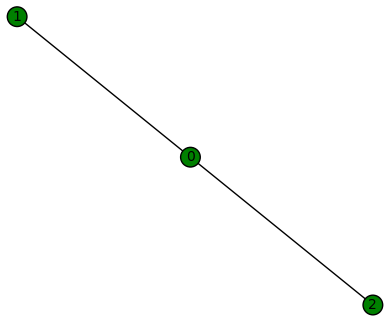

In [5]:
from sage.graphs.graph import Graph

row_index = int(4)  # or any valid index
edges = df.iloc[row_index]["Edges"]
example_set = df.iloc[row_index]["Example Set"]

tree = Graph(edges)
visualize_partial_domination(tree, example_set)


In [6]:
# load partial domination trees list (saved in previous document)

with open("trees_list.pkl", "rb") as f:
    trees_list = pickle.load(f)

print(f"Loaded {len(trees_list)} trees.\n")

print(f"First tree in list: {trees_list[0]}")
print(f"Last tree in list: {trees_list[-1]}")

Loaded 10894 trees.

First tree in list: Graph on 1 vertex
Last tree in list: Graph on 14 vertices


### 1/3 DataFrame

In [7]:
onethird_df = df[df['Partial Domination Fraction'] == '1/3']
onethird_df

,Vertices,Partial Domination Fraction,Smallest Set Size,Occurrences,Example Set,Max Minimal Set Size,Edges
0,1,1/3,1,1,"(0,)",1,[]
2,2,1/3,1,2,"(0,)",1,"[(0, 1)]"
4,3,1/3,1,3,"(0,)",1,"[(0, 1), (0, 2)]"
6,4,1/3,1,4,"(0,)",1,"[(0, 1), (0, 3), (1, 2)]"
8,4,1/3,1,4,"(0,)",1,"[(0, 1), (0, 2), (0, 3)]"
...,...,...,...,...,...,...,...
10884,14,1/3,1,1,"(0,)",4,"[(0, 1), (0, 3), (0, 5), (0, 7), (0, 9), (0, 1..."
10886,14,1/3,1,1,"(0,)",4,"[(0, 1), (0, 3), (0, 5), (0, 7), (0, 8), (0, 9..."
10888,14,1/3,1,1,"(0,)",4,"[(0, 1), (0, 3), (0, 5), (0, 6), (0, 7), (0, 8..."
10890,14,1/3,1,1,"(0,)",4,"[(0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7..."


### 2/3 DataFrame

In [8]:
twothird_df = df[df['Partial Domination Fraction'] == '2/3']
twothird_df

,Vertices,Partial Domination Fraction,Smallest Set Size,Occurrences,Example Set,Max Minimal Set Size,Edges
1,1,2/3,1,1,"(0,)",1,[]
3,2,2/3,1,2,"(0,)",1,"[(0, 1)]"
5,3,2/3,1,3,"(0,)",1,"[(0, 1), (0, 2)]"
7,4,2/3,1,2,"(0,)",2,"[(0, 1), (0, 3), (1, 2)]"
9,4,2/3,1,1,"(0,)",2,"[(0, 1), (0, 2), (0, 3)]"
...,...,...,...,...,...,...,...
10885,14,2/3,1,1,"(0,)",7,"[(0, 1), (0, 3), (0, 5), (0, 7), (0, 9), (0, 1..."
10887,14,2/3,1,1,"(0,)",8,"[(0, 1), (0, 3), (0, 5), (0, 7), (0, 8), (0, 9..."
10889,14,2/3,1,1,"(0,)",9,"[(0, 1), (0, 3), (0, 5), (0, 6), (0, 7), (0, 8..."
10891,14,2/3,1,1,"(0,)",9,"[(0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7..."


## Basic Exploratory Data Analysis

In [9]:
# basic stats on numerical categories
df.describe()

,Vertices,Smallest Set Size,Occurrences,Max Minimal Set Size
count,10894.000000,10894.000000,10894.000000,10894.000000
mean,13.244905,1.809161,12.357628,4.472278
std,1.212961,0.806783,20.143401,1.609355
min,1.000000,1.000000,1.000000,1.000000
25%,13.000000,1.000000,1.000000,3.000000
50%,14.000000,2.000000,2.000000,4.000000
75%,14.000000,2.000000,17.000000,6.000000
max,14.000000,4.000000,370.000000,9.000000


Below is a histogram of how many trees have a given smallest domination set size. It tells how common each set size is across all trees in the dataset.

Thus, most of the trees have a smallest set size of 1 or 2, with very few having a smallest set size of 3. This is the data's DISTRIBUTION.

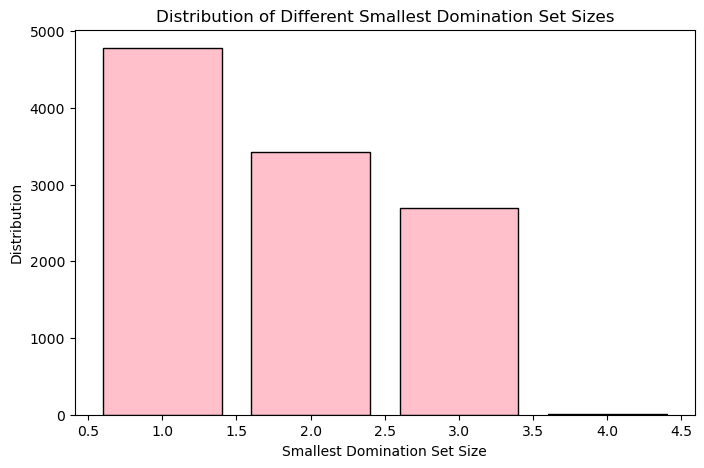

In [10]:
# distribution of smallest domination set sizes
df_counts = df["Smallest Set Size"].value_counts().reset_index()
df_counts.columns = ["Smallest Set Size", "Frequency"]

# plot
plt.figure(figsize=(8, 5))
plt.bar(df_counts["Smallest Set Size"], df_counts["Frequency"], color="pink", edgecolor="black")

plt.xlabel("Smallest Domination Set Size")
plt.ylabel("Distribution")
plt.title("Distribution of Different Smallest Domination Set Sizes")
plt.show()

Below is a bar chart that sums the total occurrences of each set size, using the tracked 'Occurrences' column. Instead of just counting how many trees have a certain set size (like the graph above graph), this one considers repeated occurrences of that size across different domination fractions or conditions. 

This shows the FREQUENCY of the data

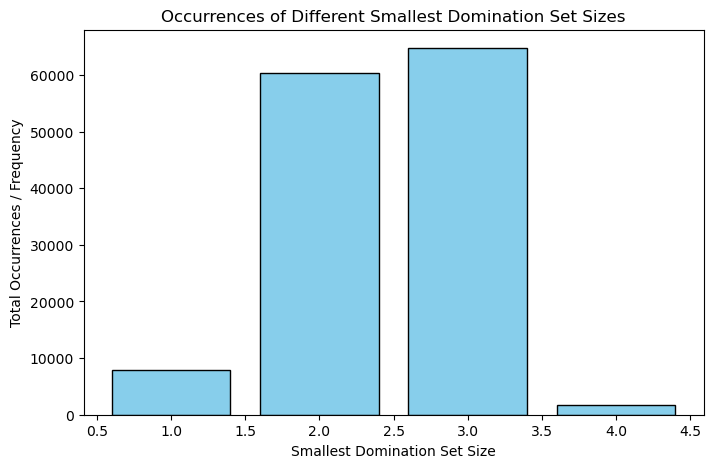

In [11]:
# occurances of smallest domination set sizes
df_occurrences = df.groupby("Smallest Set Size")["Occurrences"].sum().reset_index()

# plot
plt.figure(figsize=(8, 5))
plt.bar(df_occurrences["Smallest Set Size"], df_occurrences["Occurrences"], color="skyblue", edgecolor="black")
plt.xlabel("Smallest Domination Set Size")
plt.ylabel("Total Occurrences / Frequency")
plt.title("Occurrences of Different Smallest Domination Set Sizes")
plt.show()

## Unique Domination Instances

In [12]:
# create a new DF with only the unique occurances of a given partial domination size
unique_df = df[df['Occurrences'] == 1]
unique_df

,Vertices,Partial Domination Fraction,Smallest Set Size,Occurrences,Example Set,Max Minimal Set Size,Edges
0,1,1/3,1,1,"(0,)",1,[]
1,1,2/3,1,1,"(0,)",1,[]
9,4,2/3,1,1,"(0,)",2,"[(0, 1), (0, 2), (0, 3)]"
13,5,2/3,1,1,"(0,)",2,"[(0, 1), (0, 3), (0, 4), (1, 2)]"
15,5,2/3,1,1,"(0,)",3,"[(0, 1), (0, 2), (0, 3), (0, 4)]"
...,...,...,...,...,...,...,...
10889,14,2/3,1,1,"(0,)",9,"[(0, 1), (0, 3), (0, 5), (0, 6), (0, 7), (0, 8..."
10890,14,1/3,1,1,"(0,)",4,"[(0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7..."
10891,14,2/3,1,1,"(0,)",9,"[(0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7..."
10892,14,1/3,1,1,"(0,)",4,"[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6..."


In [13]:
# here we can look at unique instances where the smallest set size is greater than 1
size2_unique_df = unique_df[unique_df['Smallest Set Size'] > 1]
size2_unique_df

,Vertices,Partial Domination Fraction,Smallest Set Size,Occurrences,Example Set,Max Minimal Set Size,Edges
225,10,2/3,2,1,"(0, 3)",3,"[(0, 1), (0, 5), (0, 8), (1, 2), (2, 3), (3, 4..."
283,10,2/3,2,1,"(1, 7)",4,"[(0, 1), (0, 6), (0, 9), (1, 2), (1, 4), (2, 3..."
307,10,2/3,2,1,"(1, 6)",4,"[(0, 1), (0, 5), (0, 8), (1, 2), (1, 4), (2, 3..."
385,10,2/3,2,1,"(0, 1)",4,"[(0, 1), (0, 4), (0, 6), (0, 8), (1, 2), (1, 3..."
419,11,2/3,2,1,"(3, 8)",5,"[(0, 1), (0, 6), (1, 2), (2, 3), (3, 4), (3, 5..."
...,...,...,...,...,...,...,...
10833,14,2/3,2,1,"(0, 1)",7,"[(0, 1), (0, 5), (0, 8), (0, 11), (0, 12), (0,..."
10837,14,2/3,2,1,"(0, 1)",7,"[(0, 1), (0, 5), (0, 8), (0, 10), (0, 12), (0,..."
10843,14,2/3,2,1,"(0, 1)",6,"[(0, 1), (0, 5), (0, 7), (0, 9), (0, 11), (0, ..."
10845,14,2/3,2,1,"(0, 1)",7,"[(0, 1), (0, 5), (0, 7), (0, 9), (0, 11), (0, ..."


In [14]:
# reset the index on unqiue df
unique_df = unique_df.reset_index(drop=True)

# use inque df to visualize an example tree
row_index = int(0)

unique_edges = unique_df.iloc[row_index]["Edges"]
unique_example_set = unique_df.iloc[row_index]["Example Set"]

unique_tree = Graph(unique_edges)
visualize_partial_domination(unique_tree, unique_example_set)

LookupError: vertex (0) is not a vertex of the graph